In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
archivo = 'csv_creados/Data_Argentina_Relative_Terms.csv'
df = pd.read_csv(archivo)
df.head(2)

,year,GDP_Current,GDP_Constant,Broad_Money,Inflation,Velocity_Money
0,1961-12-31,0.268410,0.054278,-0.003597,0.203107,0.272007
1,1962-12-31,0.277738,-0.008520,0.101083,0.288718,0.176655


In [7]:
df.columns

Index(['year', 'GDP_Current', 'GDP_Constant', 'Broad_Money', 'Inflation',
       'Velocity_Money'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            63 non-null     object 
 1   GDP_Current     63 non-null     float64
 2   GDP_Constant    63 non-null     float64
 3   Broad_Money     63 non-null     float64
 4   Inflation       63 non-null     float64
 5   Velocity_Money  63 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [9]:
df['year'] = pd.to_datetime(df['year'])

In [10]:
df.isnull().sum()

year              0
GDP_Current       0
GDP_Constant      0
Broad_Money       0
Inflation         0
Velocity_Money    0
dtype: int64

In [11]:
df.describe()

,year,GDP_Current,GDP_Constant,Broad_Money,Inflation,Velocity_Money
count,63,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1992-12-30 14:51:25.714285696,1.591292,0.023335,1.374111,1.604749,0.217181
min,1961-12-31 00:00:00,-0.054563,-0.108945,-0.194362,-0.035611,-0.668046
25%,1977-07-01 12:00:00,0.201713,-0.020096,0.211689,0.151588,-0.140163
50%,1992-12-31 00:00:00,0.331365,0.028118,0.349018,0.288718,-0.033770
75%,2008-07-01 00:00:00,0.966935,0.065438,1.115077,1.005334,0.073334
max,2023-12-31 00:00:00,28.209270,0.107180,22.351819,30.460912,9.113007
std,NaN,4.390996,0.054967,3.230300,4.660917,1.389316


Mostramos la distribucion de nuestra varaible objetivo

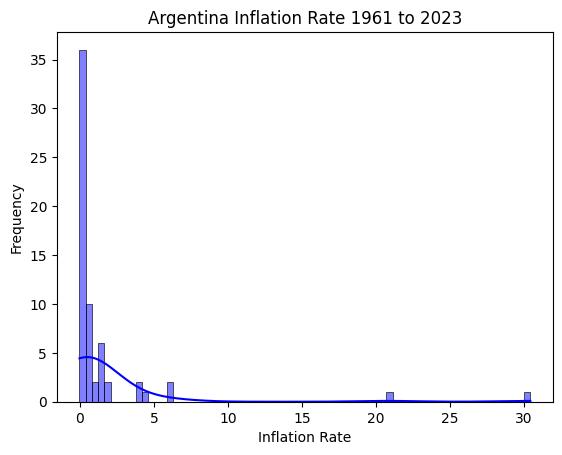

In [12]:
sns.histplot(df['Inflation'], kde=True, color='blue')
plt.title('Argentina Inflation Rate 1961 to 2023')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.show()

In [13]:
IQR_Inflation_Rate = df['Inflation'].quantile(0.75) - df['Inflation'].quantile(0.25)
IQR_Inflation_Rate

np.float64(0.853746082987118)

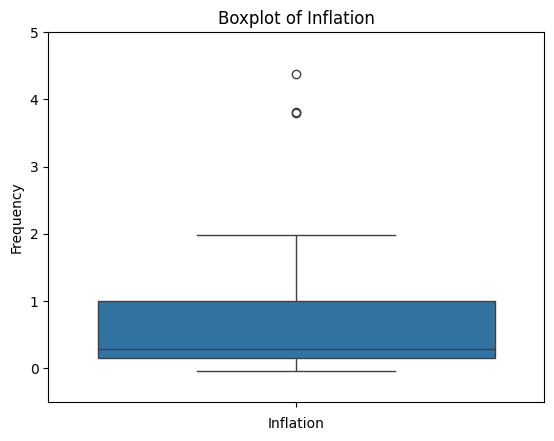

In [14]:
sns.boxplot(df['Inflation'])
plt.title('Boxplot of Inflation')
plt.xlabel('Inflation')
plt.ylabel('Frequency')
plt.ylim(-0.5, 5)
plt.show()

Manejamos los outliers de momento

In [15]:
df1 = df.copy()

upper_bond = 4*IQR_Inflation_Rate + df1['Inflation'].quantile(0.75)
lower_bond = df1['Inflation'].quantile(0.25) - 4*IQR_Inflation_Rate

df2 = df1[(df1['Inflation'] <= upper_bond) & (df1['Inflation'] >= lower_bond)]

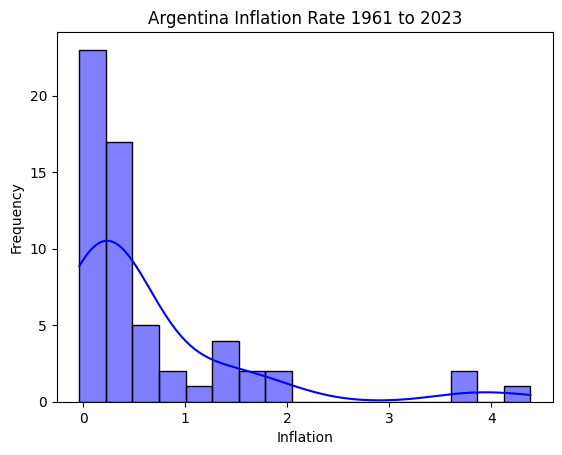

In [16]:
sns.histplot(df2['Inflation'], kde=True, color='blue')
plt.title('Argentina Inflation Rate 1961 to 2023')
plt.xlabel('Inflation')
plt.ylabel('Frequency')
plt.show()

Replicamos para Broad Money

In [17]:
IQR_Inflation_Rate = df1['Broad_Money'].quantile(0.75) - df1['Broad_Money'].quantile(0.25)

upper_bond = 4*IQR_Inflation_Rate + df1['Broad_Money'].quantile(0.75)
lower_bond = df1['Broad_Money'].quantile(0.25) - 4*IQR_Inflation_Rate

df3 = df2[(df2['Broad_Money'] <= upper_bond) & (df2['Broad_Money'] >= lower_bond)]


In [18]:
df3.to_csv('csv_creados/df_arc_normalized.csv',index=False)

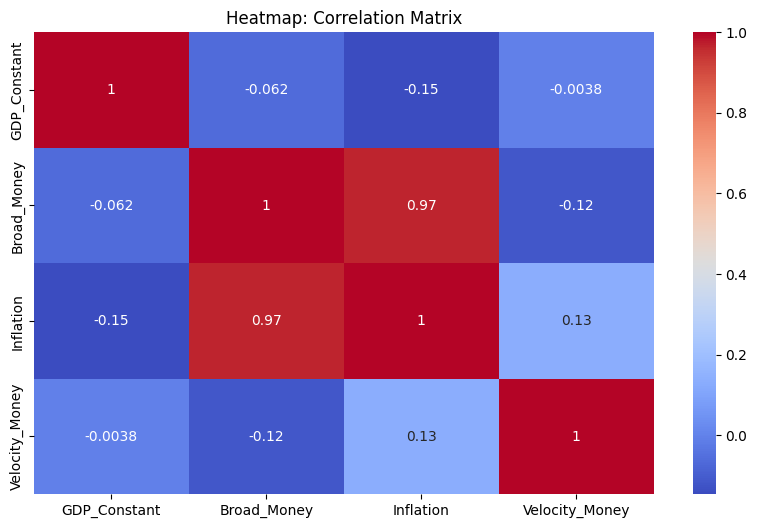

In [19]:
n_columns = ['GDP_Constant', 'Broad_Money', 'Inflation',
       'Velocity_Money']
correlation_matrix = df3[n_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

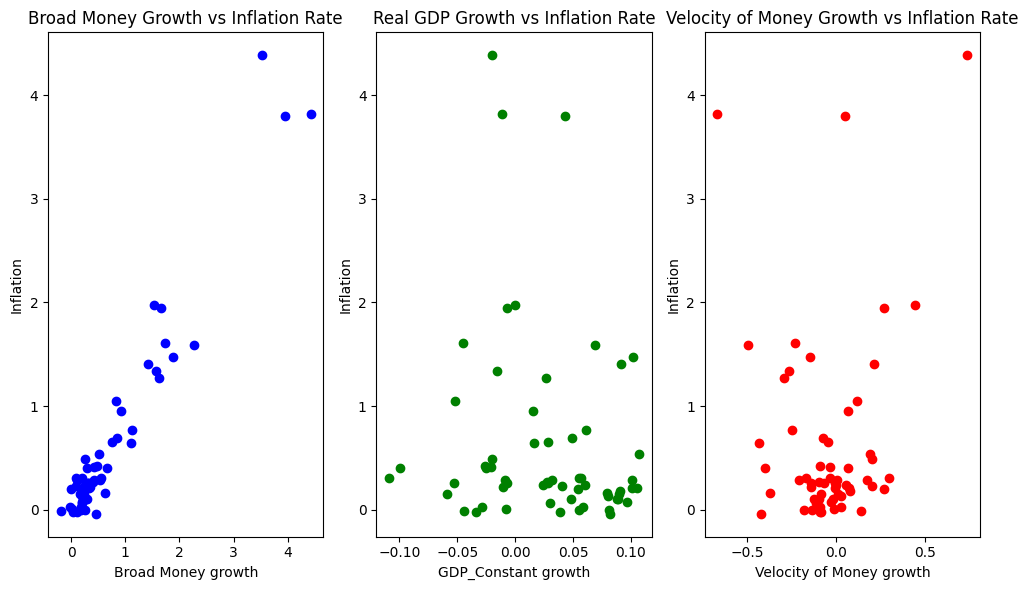

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Primer gráfico: M2 growth vs Inflation Rate
axs[0].scatter(df3['Broad_Money'], df3['Inflation'], color='blue')
axs[0].set_xlabel('Broad Money growth')
axs[0].set_ylabel('Inflation')
axs[0].set_title('Broad Money Growth vs Inflation Rate')

# Segundo gráfico: GDP real vs Inflation Rate
axs[1].scatter(df3['GDP_Constant'], df3['Inflation'], color='green')
axs[1].set_xlabel('GDP_Constant growth')
axs[1].set_ylabel('Inflation')
axs[1].set_title('Real GDP Growth vs Inflation Rate')

# Tercer gráfico: Velocity of M2 vs Inflation Rate
axs[2].scatter(df3['Velocity_Money'], df3['Inflation'], color='red')
axs[2].set_xlabel('Velocity of Money growth')
axs[2].set_ylabel('Inflation')
axs[2].set_title('Velocity of Money Growth vs Inflation Rate')


plt.tight_layout()
plt.show()


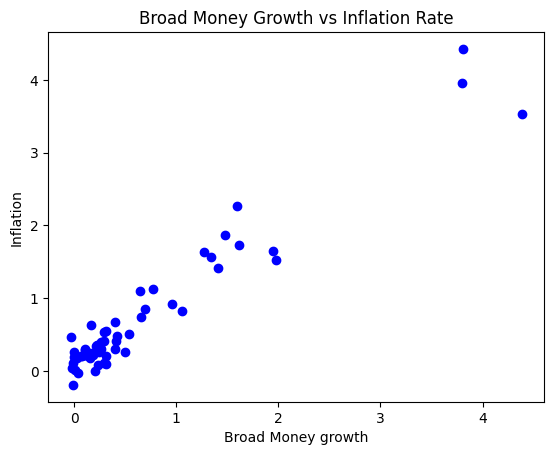

In [21]:
plt.scatter(df3['Inflation'], df3['Broad_Money'], color = 'blue')
plt.xlabel('Broad Money growth')
plt.ylabel('Inflation')
plt.title('Broad Money Growth vs Inflation Rate')
plt.show()

In [22]:
x = df3['Broad_Money']
y = df3['Inflation']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [24]:
print("Lenght of Train", len(X_train))
print("Lenght of Test", len(X_test))

Lenght of Train 47
Lenght of Test 12


In [25]:
X_train_sm = sm.add_constant(X_train)
y_train = y_train.astype(float)
X_train_sm = X_train_sm.astype(float)

model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     526.2
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           1.82e-26
Time:                        17:00:45   Log-Likelihood:                -2.8794
No. Observations:                  47   AIC:                             9.759
Df Residuals:                      45   BIC:                             13.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0795      0.050     -1.603      

In [26]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

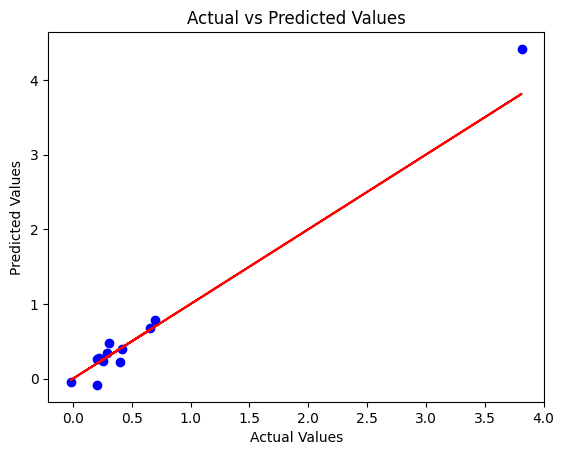

In [27]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot(y_test, y_test, 'red')
plt.show()

In [28]:
mean_residuals = np.mean(model.resid)
np.round(mean_residuals,2)

np.float64(0.0)

In [29]:
#for column in X_train.columns:
 #   correlation = np.corrcoef(X_train[column], model.resid)[0,1]
  #  print(f'Correlaton between {column} and residuals: {np.round(correlation,2)}')

# Convertir la Serie a DataFrame
X_train_df = X_train.to_frame(name='Broad Money')

# Supongamos que 'model' es tu modelo ajustado y tiene un atributo 'resid' para los residuos
residuals = model.resid

# Verificar que la longitud de los residuos coincida con la longitud de X_train
assert len(residuals) == len(X_train_df), "Length of residuals and X_train do not match"

# Calcular la correlación entre la columna única y los residuos
correlation = np.corrcoef(X_train_df['Broad Money'], residuals)[0, 1]
print(f'Correlation between Broad Money and residuals: {np.round(correlation, 2)}')

Correlation between Broad Money and residuals: 0.0


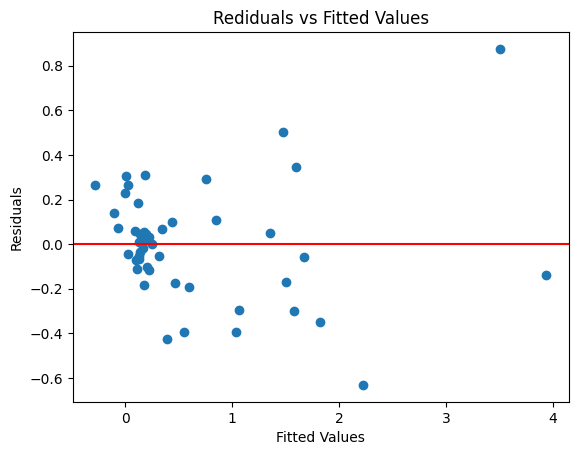

In [30]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Rediduals vs Fitted Values')
plt.show()

Los residuos se dsitribuyen aleatoriamente

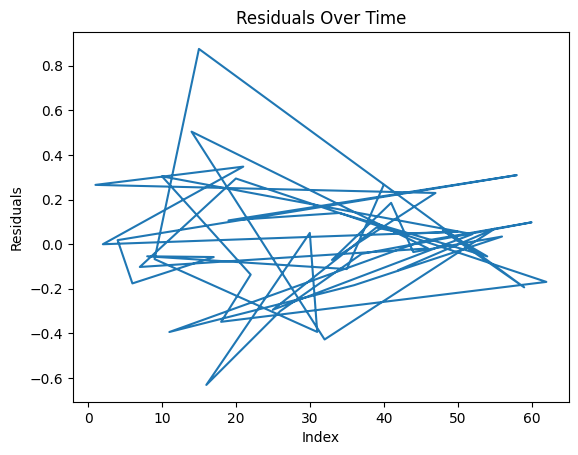

In [31]:
plt.plot(model.resid)
plt.title('Residuals Over Time')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()


No hay patrones evidentes en los residuos

In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Realizar la prueba de Breusch-Pagan para medir homoscedasticidad

bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_stat, bp_test_p_value = bp_test[1], bp_test[0]

print(f'Breusch-Pagan test p-value: {bp_test_p_value}')

Breusch-Pagan test p-value: 16.84510417004581


No hay heteroscedasticidad significativa en el modelo.

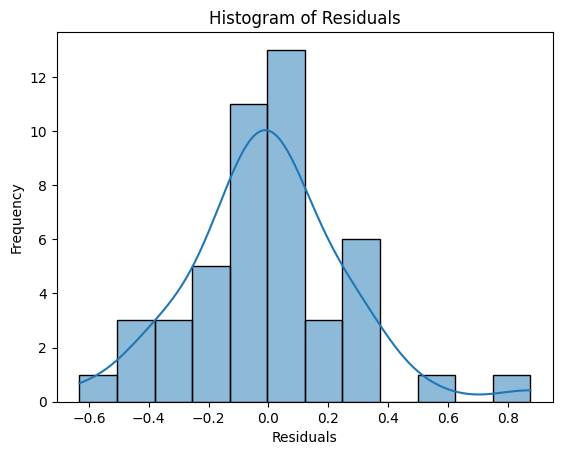

In [33]:
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Prueba de normalidad de los residuos

In [34]:
from scipy import stats

# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(model.resid)

# Imprimir los resultados
print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretación
alpha = 0.05
if p_value > alpha:
    print('Los residuos parecen seguir una distribución normal (no se rechaza H0).')
else:
    print('Los residuos no siguen una distribución normal (se rechaza H0).')

Statistic: 0.96221495010534
p-value: 0.1316937770653241
Los residuos parecen seguir una distribución normal (no se rechaza H0).


In [35]:
df3.describe()

,year,GDP_Current,GDP_Constant,Broad_Money,Inflation,Velocity_Money
count,59,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1993-05-03 10:10:10.169491584,0.675683,0.027162,0.716157,0.638452,-0.040474
min,1961-12-31 00:00:00,-0.054563,-0.108945,-0.194362,-0.035611,-0.668046
25%,1976-07-01 00:00:00,0.195035,-0.013202,0.208756,0.143405,-0.140163
50%,1994-12-31 00:00:00,0.300371,0.030456,0.331148,0.265800,-0.034004
75%,2009-07-01 12:00:00,0.741000,0.074357,0.837632,0.675033,0.069597
max,2023-12-31 00:00:00,4.274581,0.107180,4.428057,4.383228,0.739697
std,NaN,0.938124,0.054049,0.936653,0.937936,0.229364


In [36]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller


# Selección de las columnas relevantes
variables = df[['Broad_Money', 'Inflation']]

# Asegurarse de que los datos sean estacionarios (necesario para la prueba de Granger)
# Aplicaremos la prueba ADF para verificar la estacionariedad
def check_stationarity(time_series):
    result = adfuller(time_series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    return result[1] < 0.05  # Retorna True si la serie es estacionaria

is_stationary_broad_money = check_stationarity(variables['Broad_Money'])
is_stationary_inflation = check_stationarity(variables['Inflation'])

if not (is_stationary_broad_money and is_stationary_inflation):
    print("Una o ambas series no son estacionarias. Considera diferenciar las series antes de continuar.")
else:
    # Realización de la prueba de causalidad de Granger
    # Probamos hasta un máximo de 5 lags (ajusta según la cantidad de datos)
    max_lag = 10
    granger_result = grangercausalitytests(variables, maxlag=max_lag, verbose=True)

    # Revisamos los resultados
    for key, val in granger_result.items():
        print(f"Lag {key}:")
        for test_stat in val[0]:
            print(f"Test {test_stat}: {val[0][test_stat][1]}")


ADF Statistic: -4.654152
p-value: 0.000103
ADF Statistic: -5.134560
p-value: 0.000012

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=20.6496 , p=0.0000  , df_denom=59, df_num=1
ssr based chi2 test:   chi2=21.6996 , p=0.0000  , df=1
likelihood ratio test: chi2=18.6062 , p=0.0000  , df=1
parameter F test:         F=20.6496 , p=0.0000  , df_denom=59, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.9919  , p=0.0009  , df_denom=56, df_num=2
ssr based chi2 test:   chi2=17.4109 , p=0.0002  , df=2
likelihood ratio test: chi2=15.3165 , p=0.0005  , df=2
parameter F test:         F=7.9919  , p=0.0009  , df_denom=56, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.3866  , p=0.0026  , df_denom=53, df_num=3
ssr based chi2 test:   chi2=18.2942 , p=0.0004  , df=3
likelihood ratio test: chi2=15.9677 , p=0.0012  , df=3
parameter F test:         F=5.3866  , p=0.0026  , df_denom=53, df_num=3

Granger Causa

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [37]:
from statsmodels.tsa.api import VAR

# Ajustar el modelo VAR con los datos estacionarios
model = VAR(variables)
lag_order = model.select_order()
print(lag_order.summary())

# Ajuste del modelo VAR con el número óptimo de lags
results = model.fit(lag_order.aic)
print(results.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        2.539       2.614       12.67       2.568
1        1.597       1.822       4.940       1.683
2        1.303      1.678*       3.683       1.447
3        1.395       1.920       4.048       1.596
4        1.277       1.952       3.609       1.535
5        1.046       1.872       2.884       1.363
6       0.8974       1.873       2.507       1.271
7       0.8007       1.926       2.304       1.232
8       0.8765       2.152       2.525       1.366
9       0.6377       2.064       2.031       1.184
10     0.5605*       2.137      1.931*      1.165*
11      0.5612       2.287       1.999       1.223
--------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 27, Jul, 2024
Time:                     17:00:46
---------